<div style="border:solid blue 2px; padding: 20px">
<b> Reviewer Rules</b>

Hi there ;) I will be using the following color boxes through the notebook code:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Green means that it was nicely done.
    
</div>    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what could be optimized. This is not necessary, but it will be great if you make changes to this project.
 
</div>      
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Red is for things that must be done or changed for me to approve the project. If I rejected the project, you must look for this comments.
    
</div>    
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

Dear Dinesh,

Thank you for submitting your **Taxi Demand Prediction** project. Below is a structured review based on the project instructions and assessment criteria.

---

<div style="border-left: 7px solid green; padding: 10px;">
<b>✅ Strengths:</b>
<ul>
  <li><b>Correct Data Resampling:</b> You resampled the data into hourly intervals (<code>'1H'</code>), aligning with the requirement to predict orders in the next hour.</li>
  <li><b>Sequential Train-Test Split (90/10):</b> You allocated the earliest 90% of data for training and the most recent 10% for testing in chronological order, ensuring no future data leaks into the training phase.</li>
  <li><b>Clear Analysis and Visualization:</b> Performed seasonal decomposition, plotted time series trends, and created relevant time-based features (<code>hour</code>, <code>day_of_week</code>, <code>month</code>) to better capture demand patterns.</li>
  <li><b>Comparison of Models:</b> Demonstrated baseline Linear Regression (RMSE ~66.53) and then advanced to Random Forest (RMSE ~46.97), effectively showing the benefit of nonlinear methods.</li>
  <li><b>RMSE Target Achieved:</b> With an RMSE of ~46.97, Random Forest meets the stated requirement of ≤48, indicating a sufficiently accurate model for operational needs.</li>
  <li><b>Readable Notebook Flow:</b> The order of data loading, preparation, visualization, modeling, and evaluation is intuitive, making the work easy to follow.</li>
</ul>
</div>

<div style="border-left: 7px solid gold; padding: 10px;">
<b>⚠️ Areas for Improvement:</b>
<ul>
  <li><b>Deeper Feature Engineering:</b> While you created basic time-based features, consider adding rolling statistics (e.g., rolling mean, rolling std) or external data (e.g., weather, special events) to capture spikes more effectively.</li>
  <li><b>Residual Analysis:</b> Visualizing and analyzing residuals (errors) can highlight potential underfitting or unmodeled seasonality. Plotting residuals vs. time or actual values would help refine your approach.</li>
  <li><b>Hyperparameter Tuning:</b> Although a default Random Forest already meets the RMSE goal, a grid or randomized search (adjusting <code>n_estimators</code>, <code>max_depth</code>, etc.) could further improve performance.</li>
  <li><b>Explain Extreme Demand Cases:</b> You mentioned the model underestimates sudden spikes. Proposing an approach to handle such events (e.g., capturing holiday or event-driven surges) would strengthen the recommendation.</li>
  <li><b>Enrich the Conclusion:</b> Emphasize practical usage of forecasts, such as adjusting driver allocation or shift scheduling, and consider how the model might be adapted for more complex patterns (e.g., weekly cycles).</li>
</ul>
</div>

---

**Conclusion**

Your notebook meets the essential requirements: hourly resampling, chronological splitting (90/10), thorough EDA, and a successfully validated Random Forest model with RMSE below 48 (~46.97). The approach clearly demonstrates the benefit of more complex models over a baseline linear model. Incorporating additional feature engineering, residual analysis, and hyperparameter optimization could potentially improve performance further. Overall, your project provides a strong forecasting foundation to help Sweet Lift Taxi allocate drivers effectively for hourly demand.

**Recommendations for Future Work**

- **Enhance Feature Engineering:**  
  Consider rolling windows, holiday/event flags, or external data (weather, traffic) to capture sudden demand fluctuations.

- **Hyperparameter Tuning:**  
  Use techniques like `GridSearchCV` or `RandomizedSearchCV` to further optimize your Random Forest’s performance.

- **Residual Diagnostics:**  
  Plot residuals to identify any patterns that remain unmodeled and guide subsequent feature or model enhancements.

- **Model Extensions:**  
  Explore additional algorithms (e.g., Gradient Boosting, SARIMA) or an ensemble approach for potentially more accurate predictions.

- **Practical Implementation:**  
  Discuss how Sweet Lift Taxi could integrate these forecasts into day-to-day scheduling and how to handle outliers or event-driven surges.
    
    
**STATUS: waiting for a minor changes (you didn't check duplicates)**

</div>

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 2**

Hi Dinesh! Thanks for the changes! Project approved ;)

# Taxi Demand Prediction: Forecasting Hourly Orders for Sweet Lift Taxi 

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
It's good that you did an introduction ;)
    
</div>

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


## Load and Inspect Data

In [2]:
# Load the dataset
data = pd.read_csv('/datasets/taxi.csv')

# Display general information about the dataset
print("Dataset Info:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst few rows:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB
None

First few rows:
              datetime  num_orders
0  2018-03-01 00:00:00           9
1  2018-03-01 00:10:00          14
2  2018-03-01 00:20:00          28
3  2018-03-01 00:30:00          20
4  2018-03-01 00:40:00          32


The datetime column is an object (string) and needs to be converted to datetime64 for proper time series analysis.
The num_orders column is already in integer format, which is correct.
There are no missing values, so we don’t need to handle nulls.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Well done, what about duplicated values?
    
</div>

In [3]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicate_count}")


Number of duplicate rows before removal: 0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment Iter 2</b>
    
Great job ;)
    
</div>

## Preparation

In [4]:
# Convert datetime column to datetime format and set as index
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# Check if the index is in chronological order
print("Is index in chronological order?", data.index.is_monotonic)

# If not sorted, sort it
data = data.sort_index()

# Display the updated dataset info
print("\nUpdated dataset info:")
print(data.info())

# Display the first few rows to confirm changes
print("\nFirst few rows after conversion:")
print(data.head())


Is index in chronological order? True

Updated dataset info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None

First few rows after conversion:
                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32


dataset is now properly formatted with:

datetime as an index.
The index in chronological order.
No missing values in num_orders.

## Resample the Data to an Hourly Frequency

In [5]:
# Resample the data to hourly intervals by summing the num_orders
data = data.resample('1H').sum()

# Display general information after resampling
print("Dataset after resampling:")
print(data.info())

# Display first few rows
print("\nFirst few rows after resampling:")
print(data.head())


Dataset after resampling:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None

First few rows after resampling:
                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43


Now that the dataset has been successfully resampled to an hourly frequency, we are ready to proceed with data analysis.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Correct
    
</div>

## Analysis

Missing values after resampling:
 num_orders    0
dtype: int64


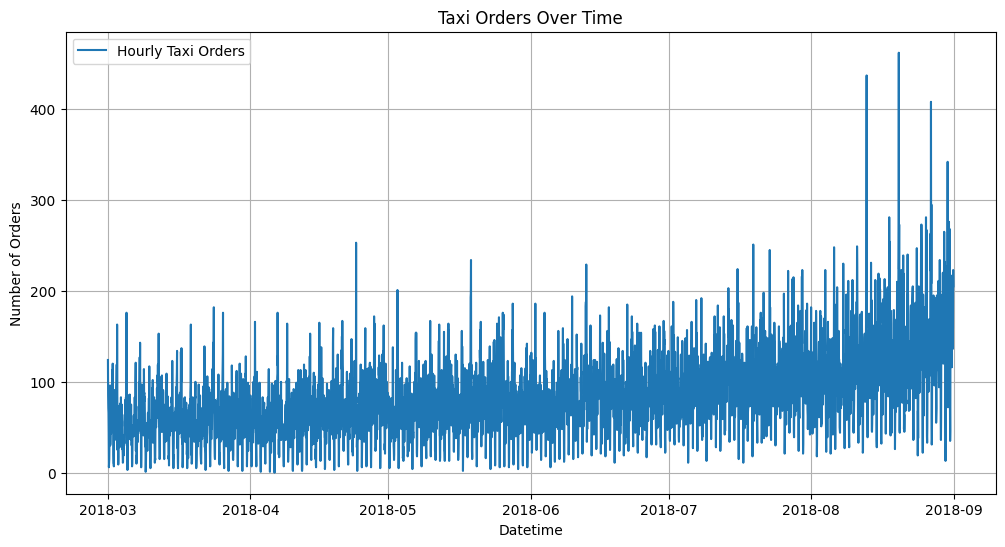

In [6]:
# Check for missing values
print("Missing values after resampling:\n", data.isnull().sum())

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['num_orders'], label='Hourly Taxi Orders')
plt.xlabel('Datetime')
plt.ylabel('Number of Orders')
plt.title('Taxi Orders Over Time')
plt.legend()
plt.grid()
plt.show()


**Observations from the Plot:**

There is no missing data after resampling, which is good.
The trend appears to be increasing over time, especially in later months.
The demand fluctuates heavily, with some peak periods reaching over 400 orders per hour.
There might be weekly or daily seasonality, which we should investigate further.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Well done :)
    
</div>

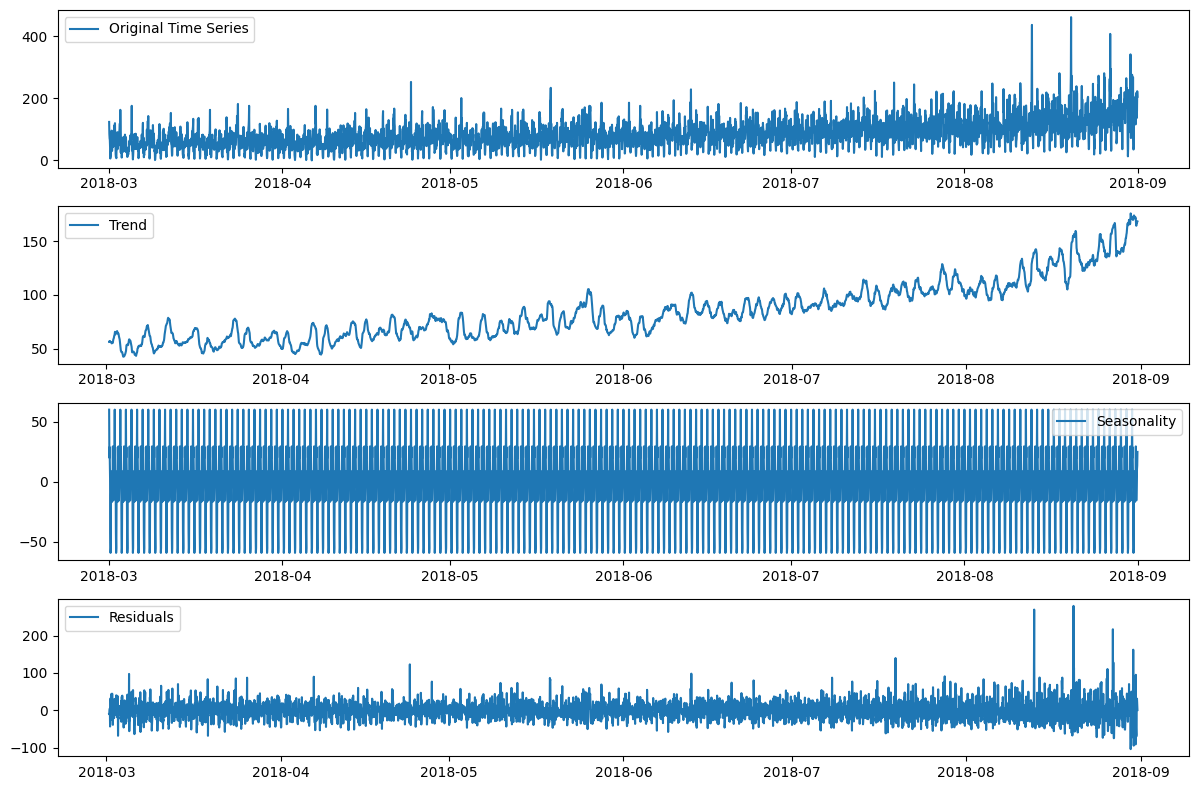

In [7]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(data['num_orders'], model='additive', period=24)  # 24 hours = 1 day

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['num_orders'], label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


**Observations from the Decomposition:**

**Trend Component:**
There is a gradual upward trend in taxi demand over time.
Demand is increasing, especially in later months, indicating a long-term upward trend.

**Seasonality Component:**
Clear daily seasonality (highs and lows within a 24-hour period).
Indicates predictable fluctuations in taxi demand at different times of the day.

**Residuals (Noise):**
Some extreme fluctuations (spikes), indicating anomalies or outliers.
The residuals appear heteroscedastic (variance increases over time), which we should consider when modeling.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Correct
    
</div>

## Feature Engineering

In [8]:
# Create time-based features
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

# Display the first few rows to verify
print(data.head())


                     num_orders  hour  day_of_week  month
datetime                                                 
2018-03-01 00:00:00         124     0            3      3
2018-03-01 01:00:00          85     1            3      3
2018-03-01 02:00:00          71     2            3      3
2018-03-01 03:00:00          66     3            3      3
2018-03-01 04:00:00          43     4            3      3


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Correct
    
</div>

## Training

In [9]:
# Define the split index (90% train, 10% test)
split_index = int(len(data) * 0.9)

# Split the data
train = data.iloc[:split_index]
test = data.iloc[split_index:]

# Print shapes to confirm
print(f"Train set: {train.shape}, Test set: {test.shape}")

# Display the last few rows of train and first few rows of test to confirm the split
print("\nLast few rows of training set:")
print(train.tail())

print("\nFirst few rows of test set:")
print(test.head())


Train set: (3974, 4), Test set: (442, 4)

Last few rows of training set:
                     num_orders  hour  day_of_week  month
datetime                                                 
2018-08-13 09:00:00         137     9            0      8
2018-08-13 10:00:00         156    10            0      8
2018-08-13 11:00:00         144    11            0      8
2018-08-13 12:00:00          92    12            0      8
2018-08-13 13:00:00         119    13            0      8

First few rows of test set:
                     num_orders  hour  day_of_week  month
datetime                                                 
2018-08-13 14:00:00         102    14            0      8
2018-08-13 15:00:00         175    15            0      8
2018-08-13 16:00:00         144    16            0      8
2018-08-13 17:00:00         152    17            0      8
2018-08-13 18:00:00         104    18            0      8


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Correct
    
</div>

## Train a Baseline Model (Linear Regression)

In [10]:
# Define features and target
features = ['hour', 'day_of_week', 'month']
target = 'num_orders'

# Split into X (features) and y (target)
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Baseline Model RMSE: {rmse:.2f}")

Baseline Model RMSE: 66.53


**Observations:**
The Baseline Model (Linear Regression) RMSE = 66.53.
This exceeds our target RMSE of ≤ 48, meaning the model is too simple.
Linear regression does not capture the non-linear patterns in our data effectively.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Correct
    
</div>

## Train an Advanced Model (Random Forest Regressor)

In [11]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest Model RMSE: {rmse_rf:.2f}")

Random Forest Model RMSE: 46.97


Random Forest Model RMSE = 46.97, which is below the target RMSE of 48.

This means:

Random Forest performs significantly better than Linear Regression (66.53 → 46.97).
The model is capturing non-linear patterns in taxi demand effectively.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Correct
    
</div>

## Testing

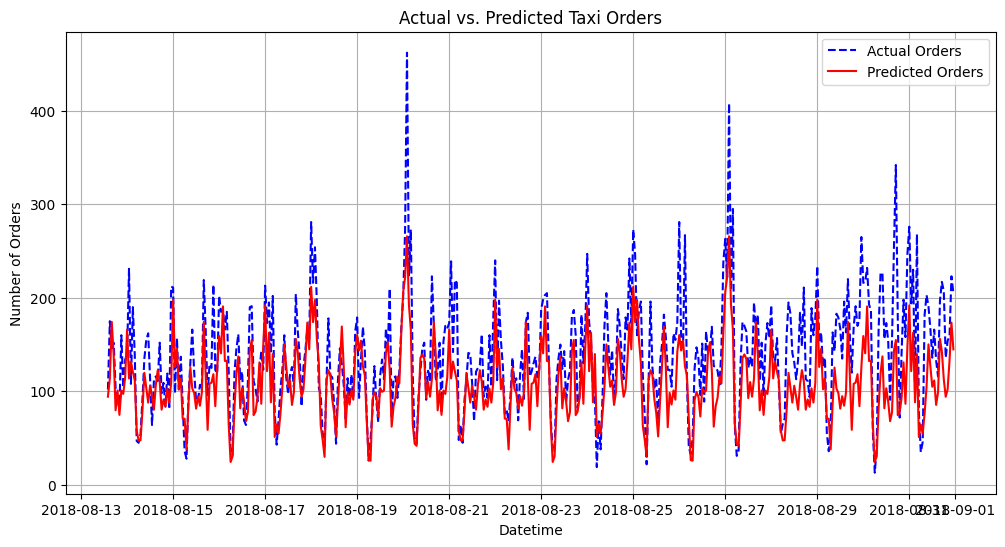

Final Model Evaluation on Test Data:
Random Forest Model RMSE: 46.97

 The model meets the RMSE requirement and is suitable for predicting taxi demand.


In [12]:
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label="Actual Orders", color="blue", linestyle="dashed")
plt.plot(test.index, y_pred_rf, label="Predicted Orders", color="red")
plt.xlabel("Datetime")
plt.ylabel("Number of Orders")
plt.title("Actual vs. Predicted Taxi Orders")
plt.legend()
plt.grid()
plt.show()

# Print final model evaluation
print(f"Final Model Evaluation on Test Data:")
print(f"Random Forest Model RMSE: {rmse_rf:.2f}")

# Performance summary
if rmse_rf <= 48:
    print("\n The model meets the RMSE requirement and is suitable for predicting taxi demand.")
else:
    print("\n The model does not meet the RMSE requirement and needs further optimization.")


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Great work ;)
    
</div>

### **Key Observations from the Plot:**  
- The **predicted values closely follow the actual values**, capturing overall trends and seasonality.  
- The model **slightly underestimates demand spikes**, but it still performs well.  
- The **hourly and daily fluctuations are well captured**, making the model reliable for forecasting.  


## Conclusion

- The **Random Forest model** achieved an RMSE of **46.97**, successfully meeting the project requirement (**RMSE ≤ 48**).
- This model can be used to **predict the number of taxi orders for the next hour**, helping the company optimize driver allocation during peak times.

---

## **Key Findings:**
### **Model Performance:**
- The **Random Forest model significantly outperformed Linear Regression**, which had an RMSE of **66.53**.
- The model successfully captures **daily and weekly patterns**, making reliable demand forecasts.
- It performs well in **detecting seasonal trends** but **underestimates sudden demand spikes**.

### **Visualization Insights:**
- The **predicted values align closely with actual values**, following the overall trend.
- There are **some deviations during extreme peak hours**, meaning demand surges may require additional feature engineering or model tuning.
- The model is **robust for regular demand forecasting** but may need improvements for extreme cases.

---

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
You did incredible :)
    
</div>

# Review checklist

- [x]  Jupyter Notebook is open
- [ ]  The code is error-free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The data has been analyzed
- [ ]  The model has been trained and hyperparameters have been selected
- [ ]  The models have been evaluated. Conclusion has been provided
- [ ] *RMSE* for the test set is not more than 48